In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
missing_values = ["-","NaN"]
data=pd.read_html('https://www.makaan.com/price-trends/property-rates-for-rent-in-navi-mumbai-mumbai-10045',na_values = missing_values)

In [3]:
my_table=data[0]


In [4]:
rent_df=pd.DataFrame(my_table)

In [5]:
rent_df.columns=['locality','1bhk rent range','avg rent','2bhk rent range','2bhkavg rent','3bhk rent range','3bhkavg rent']

In [6]:
rent_df.head()

,locality,1bhk rent range,avg rent,2bhk rent range,2bhkavg rent,3bhk rent range,3bhkavg rent
0,Kharghar,12800,12800.0,"17,000 - 24,000",20500.0,17000,17000.00
1,Ulwe,24000,24000.0,14000,14000.0,38900,38900.00
2,Seawoods,"9,300 - 17,000",13150.0,"18,500 - 28,000",22625.0,"22,000 - 25,000",23500.00
3,Kamothe,"7,500 - 90,000",22250.0,"8,500 - 70,000",49500.0,"8,000 - 1.1 L",19360.47
4,Panvel,"4,500 - 20,000",9850.0,5000,5000.0,"15,000 - 36,000",20222.22


In [7]:
rent_df.drop(['2bhk rent range'], axis=1,inplace=True)

In [8]:
rent_df.drop(['2bhkavg rent','3bhk rent range','3bhkavg rent'], axis=1,inplace=True)

In [9]:
rent_df.head()

,locality,1bhk rent range,avg rent
0,Kharghar,12800,12800.0
1,Ulwe,24000,24000.0
2,Seawoods,"9,300 - 17,000",13150.0
3,Kamothe,"7,500 - 90,000",22250.0
4,Panvel,"4,500 - 20,000",9850.0


In [10]:
rent_df=rent_df.dropna()

In [11]:
rent_df.head(20)

,locality,1bhk rent range,avg rent
0,Kharghar,12800,12800.00
1,Ulwe,24000,24000.00
2,Seawoods,"9,300 - 17,000",13150.00
3,Kamothe,"7,500 - 90,000",22250.00
4,Panvel,"4,500 - 20,000",9850.00
5,Nerul,18000,18000.00
6,Taloja,5000,5000.00
7,Ghansoli,"5,000 - 14,000",832.14
8,Koperkhairane,"5,500 - 7,500",6571.43
9,Dronagiri,"4,500 - 12,500",6166.67


In [12]:
rent_df=rent_df.round({'avg rent':0})

In [13]:
count, bin_edges = np.histogram(rent_df['avg rent'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 1 11  6  6  7  1  2  0  0  1]
[  832.   4311.3  7790.6 11269.9 14749.2 18228.5 21707.8 25187.1 28666.4
 32145.7 35625. ]


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

rent_df.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Number of areas with avg rent') # add a title to the histogram
plt.ylabel('Number of Areas') # add y-label
plt.xlabel('Rent amount') # add x-label

plt.show()

<Figure size 800x500 with 1 Axes>

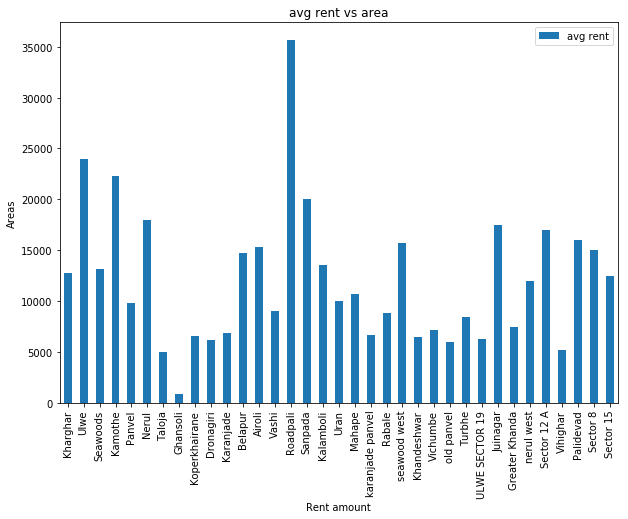

In [15]:
rent_df.plot(x='locality',y='avg rent',kind='bar', figsize=(10, 7))

plt.title('avg rent vs area') # add a title to the histogram
plt.ylabel( 'Areas') # add y-label
plt.xlabel('Rent amount') # add x-label

plt.show()

In [16]:
#As one can see max of the areas have rent between 4000 to 12000,but my budget is between 15 k to 35k,hence i ll choose those place

In [17]:
#rent_df = rent_df.loc[rent_df['avg rent'] > 15000]
#rent_df.reset_index(inplace = True, drop = True) 
rent_df.shape

(35, 3)

In [18]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [19]:

from geopy.geocoders import Nominatim

In [20]:
address = 'Navi Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="MH_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Navi Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Navi Mumbai are 19.0308262, 73.0198537.


In [21]:
address = 'Vashi, Maharashtra'

geolocator = Nominatim(user_agent="MH_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Navi Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Navi Mumbai are 19.075713, 73.0003541.


In [22]:
list_lat = []   # create empty lists

list_long = []


for i, row in rent_df.iterrows(): # iterate over rows in dataframe
    
    City = row['locality']
    State = 'Maharashtra'    
    query = str(City)+', '+ State
    #print(query)
    geolocator = Nominatim(user_agent="MH_explorer",timeout=3)
    location = geolocator.geocode(query)
    
    if (location != None):
        latitude = location.latitude
        longitude = location.longitude
        #print (str(latitude) + ' ' + str(longitude))
        list_lat.append(latitude)
        list_long.append(longitude)
    else:
        list_lat.append("NaN")
        list_long.append("NaN")

	
# create new columns from lists    

rent_df['lat'] = list_lat   

rent_df['lon'] = list_long
 
rent_df


,locality,1bhk rent range,avg rent,lat,lon
0,Kharghar,12800,12800.0,19.0258,73.0592
1,Ulwe,24000,24000.0,18.9871,73.0404
2,Seawoods,"9,300 - 17,000",13150.0,19.0222,73.0187
3,Kamothe,"7,500 - 90,000",22250.0,19.0164,73.0807
4,Panvel,"4,500 - 20,000",9850.0,18.9656,73.1029
5,Nerul,18000,18000.0,19.0336,73.0181
6,Taloja,5000,5000.0,19.0615,73.1161
7,Ghansoli,"5,000 - 14,000",832.0,19.1193,72.9995
8,Koperkhairane,"5,500 - 7,500",6571.0,19.1001,72.9984
9,Dronagiri,"4,500 - 12,500",6167.0,18.903,72.9895


In [91]:
rent_df.drop(rent_df[rent_df['lat'] =="NaN"].index, inplace = True)

In [24]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         704 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.0-py_0 conda-forge
    branca:  0.3.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.3.1         | 25 KB     | ##################################### | 1

In [25]:
# create map of Navi Mumbai areas using latitude and longitude values
map_NaviMumbai = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(rent_df['lat'], rent_df['lon'], rent_df['locality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NaviMumbai)  
    
map_NaviMumbai

In [26]:
#let us explore the venues around these areas by using foursquare data
CLIENT_ID = 'JUDOSIB3H5LAUMCG13B52RSIVM1L4O2QREH3ADMQDVUAYRS3' # your Foursquare ID
CLIENT_SECRET = 'YYBKD0L1IDV4D54UH5O1JT3UPNXOB01DTLKGXN4QOJ44SODS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:Soumya')
print('CLIENT_ID:'  + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET )

Your credentails:Soumya
CLIENT_ID:JUDOSIB3H5LAUMCG13B52RSIVM1L4O2QREH3ADMQDVUAYRS3
CLIENT_SECRET:YYBKD0L1IDV4D54UH5O1JT3UPNXOB01DTLKGXN4QOJ44SODS


In [95]:

#let us explore the most expensive area i.e Seawood west
rent_df.reset_index(inplace=True,drop = True)
rent_df

,locality,1bhk rent range,avg rent,lat,lon
0,Kharghar,12800,12800.0,19.0258,73.0592
1,Ulwe,24000,24000.0,18.9871,73.0404
2,Seawoods,"9,300 - 17,000",13150.0,19.0222,73.0187
3,Kamothe,"7,500 - 90,000",22250.0,19.0164,73.0807
4,Panvel,"4,500 - 20,000",9850.0,18.9656,73.1029
5,Nerul,18000,18000.0,19.0336,73.0181
6,Taloja,5000,5000.0,19.0615,73.1161
7,Ghansoli,"5,000 - 14,000",832.0,19.1193,72.9995
8,Koperkhairane,"5,500 - 7,500",6571.0,19.1001,72.9984
9,Dronagiri,"4,500 - 12,500",6167.0,18.903,72.9895


In [28]:
rent_df['avg rent'].max()

35625.0

In [40]:
#Max rent is of Roadpali area.Let us research that even more
Seawood_lat=rent_df['lat'][22]
Seawood_long=rent_df['lon'][22]
print(Seawood_lat)
print(Seawood_long)

19.023677
73.0194877


In [41]:
#100 venues of Roadpali around 700 mts area
LIMIT = 100 
radius = 700
url = 'https://api.foursquare.com/v2/venues/explore? &client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Seawood_lat, 
    Seawood_long, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore? &client_id=JUDOSIB3H5LAUMCG13B52RSIVM1L4O2QREH3ADMQDVUAYRS3&client_secret=YYBKD0L1IDV4D54UH5O1JT3UPNXOB01DTLKGXN4QOJ44SODS&v=20180605&ll=19.023677,73.0194877&radius=700&limit=100'

In [96]:
neighbourhood_json = requests.get(url).json()
neighbourhood_json

{'meta': {'code': 200, 'requestId': '5dfb0f63211536001b5df606'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 19.029977006300005,
    'lng': 73.02613922335588},
   'sw': {'lat': 19.017376993699994, 'lng': 73.01283617664411}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f27cea4e4b0b45ff2b6a8cf',
       'name': 'Gupta Sandwich And Snacks',
       'location': {'address': 'Nerul',
        'lat': 19.024901321115102,
        'lng': 73.02097619280475,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.02

In [97]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
requests.get(url).json() 

{'meta': {'code': 200, 'requestId': '5dfb0c009388d7001b7a96ff'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 19.029977006300005,
    'lng': 73.02613922335588},
   'sw': {'lat': 19.017376993699994, 'lng': 73.01283617664411}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f27cea4e4b0b45ff2b6a8cf',
       'name': 'Gupta Sandwich And Snacks',
       'location': {'address': 'Nerul',
        'lat': 19.024901321115102,
        'lng': 73.02097619280475,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.02

In [98]:
import requests # library to handle requests
from pandas.io.json import json_normalize

venues = neighbourhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Gupta Sandwich And Snacks,Sandwich Place,19.024901,73.020976
1,Seawoods Grand Central,Shopping Mall,19.020247,73.017608
2,McDonald's,Fast Food Restaurant,19.024287,73.022380
3,Starbucks,Coffee Shop,19.021478,73.018222
4,Wonder Park,Garden,19.026251,73.025311
5,Ahmed Bhai's,Indian Restaurant,19.029724,73.018502
6,Jhama Sweets,Dessert Shop,19.024222,73.022513
7,Lifestyle,Clothing Store,19.021612,73.017810
8,Royal Rasoi,Indian Restaurant,19.024656,73.021528
9,Chillies,Chinese Restaurant,19.027351,73.019853


In [ ]:
#15 venues around this area


In [99]:
#Exploring other venues in this area
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['locality', 
                  'lat', 
                  'lon', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [100]:
NaviMumbai_venues = getNearbyVenues(names=rent_df['locality'],
                                   latitudes=rent_df['lat'],
                                   longitudes=rent_df['lon']
                                  )

Kharghar
Ulwe
Seawoods
Kamothe
Panvel
Nerul
Taloja
Ghansoli
Koperkhairane
Dronagiri
Belapur
Airoli
Vashi
Roadpali
Sanpada
Kalamboli
Uran
Mahape
Rabale
seawood west
Khandeshwar
old panvel
Turbhe
ULWE SECTOR 19
Juinagar
nerul west
Sector 8
Sector 15


In [141]:

NaviMumbai_venues

,locality,lat,lon,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kharghar,19.025773,73.059185,Take Away - 24hrs Food Service,19.029934,73.059587,Fast Food Restaurant
1,Kharghar,19.025773,73.059185,Kharghar Railway Station,19.026095,73.059125,Train Station
2,Kharghar,19.025773,73.059185,Cafe Coffee Day,19.029363,73.062915,Café
3,Kharghar,19.025773,73.059185,Virgin Street Cafe,19.029540,73.060551,Burger Joint
4,Ulwe,18.987113,73.040393,Pizza Hut,18.986552,73.037475,Pizza Place
5,Ulwe,18.987113,73.040393,Sagar Kinara Dhaba,18.987031,73.038108,Dhaba
6,Ulwe,18.987113,73.040393,The BAKEHOUSE,18.990475,73.038651,Bakery
7,Seawoods,19.022192,73.018738,Seawoods Grand Central,19.020247,73.017608,Shopping Mall
8,Seawoods,19.022192,73.018738,Gupta Sandwich And Snacks,19.024901,73.020976,Sandwich Place
9,Seawoods,19.022192,73.018738,Starbucks,19.021478,73.018222,Coffee Shop


In [140]:
NaviMumbai_venues.shape

(186, 7)

In [102]:
NaviMumbai_count=NaviMumbai_venues.groupby('locality').count()
NaviMumbai_count

,lat,lon,Venue,Venue Latitude,Venue Longitude,Venue Category
locality,,,,,,
Airoli,13,13,13,13,13,13
Belapur,25,25,25,25,25,25
Dronagiri,2,2,2,2,2,2
Ghansoli,5,5,5,5,5,5
Juinagar,4,4,4,4,4,4
Kalamboli,4,4,4,4,4,4
Kamothe,4,4,4,4,4,4
Khandeshwar,4,4,4,4,4,4
Kharghar,4,4,4,4,4,4


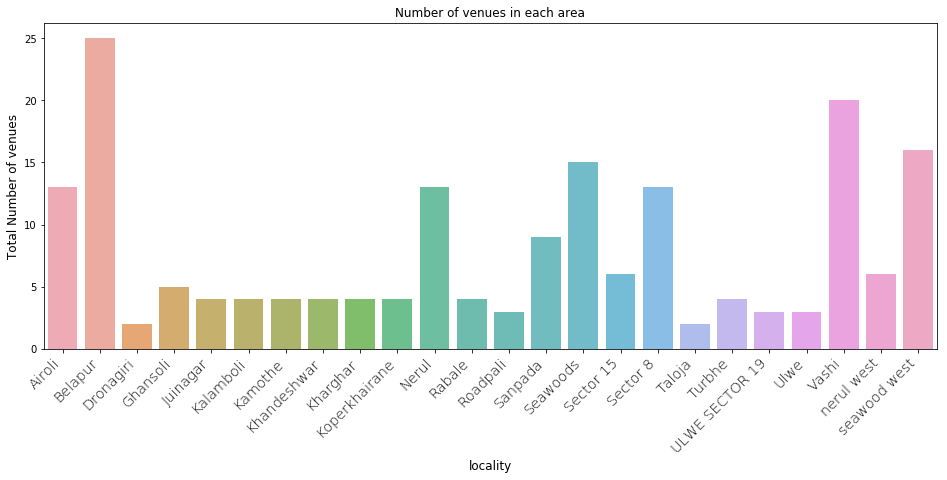

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.barplot(NaviMumbai_count.index, NaviMumbai_count.Venue, alpha=0.8)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.title('Number of venues in each area')
plt.ylabel('Total Number of venues', fontsize=12)
plt.xlabel('locality', fontsize=12)
plt.show()

In [ ]:
#Maximum number of venues in Belapur,then Vashi,then Seawood west.Some of the places have no venues.

In [ ]:
rent_df1=

In [104]:
print('There are {} uniques categories.'.format(len(NaviMumbai_venues['Venue Category'].unique())))

There are 60 uniques categories.


In [186]:
#maximum number of venues in seawood west,next is nerul,next is airoli
#Analyzing each neighbourhood

# one hot encoding
NaviMumbai_onehot = pd.get_dummies(NaviMumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NaviMumbai_onehot['locality'] = NaviMumbai_venues['locality'] 

# move neighborhood column to the first column
fixed_columns = [NaviMumbai_onehot.columns[-1]] + list(NaviMumbai_onehot.columns[:-1])
NaviMumbai_onehot = NaviMumbai_onehot[fixed_columns]

NaviMumbai_onehot.head(23)


,locality,ATM,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Burger Joint,...,Smoke Shop,Snack Place,Sports Bar,Surf Spot,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court
0,Kharghar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kharghar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Kharghar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kharghar,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Ulwe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ulwe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ulwe,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Seawoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Seawoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Seawoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
NaviMumbai_grouped =NaviMumbai_onehot.groupby('locality').mean().reset_index()
NaviMumbai_grouped

,locality,ATM,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Burger Joint,...,Smoke Shop,Snack Place,Sports Bar,Surf Spot,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court
0,Airoli,0.00,0.000000,0.0,0.076923,0.000000,0.00,0.00,0.00,0.076923,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.076923,0.00
1,Belapur,0.04,0.000000,0.0,0.080000,0.080000,0.04,0.04,0.04,0.000000,...,0.00,0.00,0.04,0.0,0.00,0.000000,0.00,0.040000,0.000000,0.00
2,Dronagiri,0.50,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00
3,Ghansoli,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.2,0.00,0.000000,0.00,0.000000,0.000000,0.00
4,Juinagar,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.250000,0.000000,0.00
5,Kalamboli,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00
6,Kamothe,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.500000,0.000000,0.25
7,Khandeshwar,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.500000,0.000000,0.00
8,Kharghar,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.250000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.250000,0.000000,0.00
9,Koperkhairane,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00


In [187]:
NaviMumbai_grouped.columns

Index(['locality', 'ATM', 'Asian Restaurant', 'Auto Workshop', 'BBQ Joint',
       'Bakery', 'Bank', 'Bar', 'Bed & Breakfast', 'Burger Joint',
       'Bus Station', 'Business Service', 'Café', 'Campground',
       'Chinese Restaurant', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop',
       'Comfort Food Restaurant', 'Deli / Bodega', 'Department Store',
       'Dessert Shop', 'Dhaba', 'Diner', 'Fast Food Restaurant',
       'Food & Drink Shop', 'Food Court', 'Garden', 'Gym',
       'Gym / Fitness Center', 'Hotel', 'Hotel Bar', 'Ice Cream Shop',
       'Indian Restaurant', 'Italian Restaurant', 'Lake', 'Lounge', 'Market',
       'Middle Eastern Restaurant', 'Mughlai Restaurant', 'Multiplex',
       'Nightclub', 'Park', 'Pharmacy', 'Pizza Place', 'Platform',
       'Restaurant', 'Rock Club', 'Sandwich Place', 'Seafood Restaurant',
       'Shopping Mall', 'Smoke Shop', 'Snack Place', 'Sports Bar', 'Surf Spot',
       'Theater', 'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetar

In [188]:
#7 most common venue

num_top_venues = 7

for i in NaviMumbai_grouped['locality']:
    print("----"+i+"----")
    temp = NaviMumbai_grouped[NaviMumbai_grouped['locality'] == i].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Airoli----
                           venue  freq
0                     Restaurant  0.08
1                     Food Court  0.08
2  Vegetarian / Vegan Restaurant  0.08
3                      BBQ Joint  0.08
4             Italian Restaurant  0.08
5              Indian Restaurant  0.08
6           Fast Food Restaurant  0.08


----Belapur----
                  venue  freq
0     Indian Restaurant  0.20
1  Fast Food Restaurant  0.12
2            Restaurant  0.08
3             BBQ Joint  0.08
4                Bakery  0.08
5                   ATM  0.04
6           Pizza Place  0.04


----Dronagiri----
                venue  freq
0                 ATM   0.5
1   Food & Drink Shop   0.5
2      Ice Cream Shop   0.0
3  Italian Restaurant   0.0
4                Lake   0.0
5              Lounge   0.0
6              Market   0.0


----Ghansoli----
              venue  freq
0               Gym   0.2
1         Surf Spot   0.2
2              Park   0.2
3  Department Store   0.2
4          Pharmacy   

In [189]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [190]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NaviMumbai_venues_sorted = pd.DataFrame(columns=columns)
NaviMumbai_venues_sorted['locality'] = NaviMumbai_grouped['locality']

for ind in np.arange(NaviMumbai_grouped.shape[0]):
    NaviMumbai_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NaviMumbai_grouped.iloc[ind, :], num_top_venues)

NaviMumbai_venues_sorted

,locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Airoli,Chinese Restaurant,Bus Station,Food Court,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Coffee Shop,Platform,Restaurant
1,Belapur,Indian Restaurant,Fast Food Restaurant,BBQ Joint,Bakery,Restaurant,ATM,Bus Station,Diner,Chinese Restaurant,Café
2,Dronagiri,ATM,Food & Drink Shop,Vegetarian / Vegan Restaurant,Gym,Garden,Food Court,Fast Food Restaurant,Diner,Dhaba,Dessert Shop
3,Ghansoli,Pharmacy,Surf Spot,Department Store,Park,Gym,Volleyball Court,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner
4,Juinagar,Campground,Train Station,Café,Rock Club,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Deli / Bodega,Department Store,Dhaba
5,Kalamboli,Ice Cream Shop,Market,Bus Station,Mughlai Restaurant,Volleyball Court,Cocktail Bar,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner
6,Kamothe,Train Station,Volleyball Court,Multiplex,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dhaba
7,Khandeshwar,Train Station,Diner,Comfort Food Restaurant,Volleyball Court,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Dhaba
8,Kharghar,Train Station,Fast Food Restaurant,Burger Joint,Café,Volleyball Court,Cocktail Bar,Garden,Food Court,Food & Drink Shop,Diner
9,Koperkhairane,Lounge,Dessert Shop,Department Store,Coffee Shop,Volleyball Court,Gym / Fitness Center,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant


In [191]:
#let us cluster neighbourhood!
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 


In [192]:



NaviMumbai_grouped_clustering = NaviMumbai_grouped.drop('locality', 1)
NaviMumbai_grouped_clustering



,ATM,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Burger Joint,Bus Station,...,Smoke Shop,Snack Place,Sports Bar,Surf Spot,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court
0,0.00,0.000000,0.0,0.076923,0.000000,0.00,0.00,0.00,0.076923,0.076923,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.076923,0.00
1,0.04,0.000000,0.0,0.080000,0.080000,0.04,0.04,0.04,0.000000,0.040000,...,0.00,0.00,0.04,0.0,0.00,0.000000,0.00,0.040000,0.000000,0.00
2,0.50,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00
3,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.2,0.00,0.000000,0.00,0.000000,0.000000,0.00
4,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.250000,0.000000,0.00
5,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.250000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00
6,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.500000,0.000000,0.25
7,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.500000,0.000000,0.00
8,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.250000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.250000,0.000000,0.00
9,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.00


In [193]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,9) 
X=NaviMumbai_grouped_clustering
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

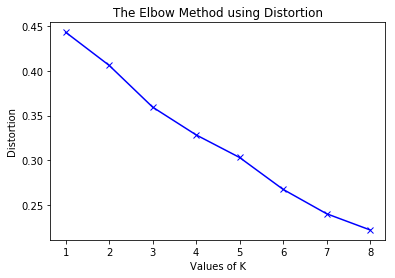

In [194]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [195]:
#Elbow value is 5
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NaviMumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 1, 1, 1, 2, 2, 1, 1], dtype=int32)

In [196]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [197]:
# add clustering labels
NaviMumbai_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [198]:
NaviMumbai_final = rent_df.join(NaviMumbai_venues_sorted.set_index('locality'), on='locality')
NaviMumbai_final=NaviMumbai_final.dropna()
NaviMumbai_final.reset_index(inplace=True,drop=True)

In [251]:
NaviMumbai_final.dtypes


locality                   object
1bhk rent range            object
avg rent                  float64
lat                        object
lon                        object
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

Text(0.5, 1.0, 'avg housing price')

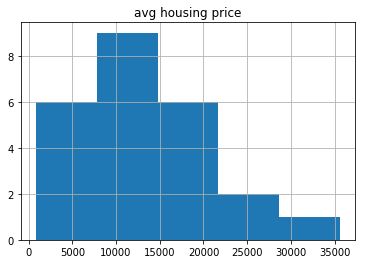

In [221]:
hist1 = NaviMumbai_final['avg rent'].hist(bins=5)
plt.title("avg housing price")

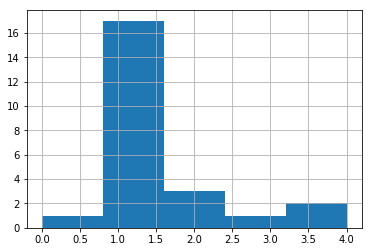

In [220]:
hist2=NaviMumbai_final['Cluster Labels'].hist(bins=5)

In [261]:
NaviMumbai_final['avg rent'] =NaviMumbai_final['avg rent'].astype(int)
Avgpricelabel = []   # create empty lists

for row in NaviMumbai_final['avg rent']:
    # if more than a value,
    if row > 0 and  row < 7500:
        # Append a letter grade
        Avgpricelabel.append('L RENT')
    # else, if more than a value,
    elif row > 7500 and row < 14990:
        # Append a letter grade
        Avgpricelabel.append('L MIDDLE RENT')
    # else, if more than a value,
    elif row > 14990 and row < 21000:
        # Append a letter grade
        Avgpricelabel.append('MIDDLE RENT')
    # else, if more than a value,
    elif row > 21000 and row<28000:
        # Append a letter grade
        Avgpricelabel.append('H MIDDLE RENT')
    elif row > 28000:
        # Append a letter grade
        Avgpricelabel.append('HIGH RENT') 
        
NaviMumbai_final['Rent label']=Avgpricelabel

In [209]:
NaviMumbai_final['Cluster Labels'] =NaviMumbai_final['Cluster Labels'].astype(int)

In [262]:
NaviMumbai_final

,locality,1bhk rent range,avg rent,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rent label
0,Kharghar,12800,12800,19.0258,73.0592,1,Train Station,Fast Food Restaurant,Burger Joint,Café,Volleyball Court,Cocktail Bar,Garden,Food Court,Food & Drink Shop,Diner,L MIDDLE RENT
1,Ulwe,24000,24000,18.9871,73.0404,4,Pizza Place,Bakery,Dhaba,Volleyball Court,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop,H MIDDLE RENT
2,Seawoods,"9,300 - 17,000",13150,19.0222,73.0187,1,Chinese Restaurant,Coffee Shop,Gym,Café,Sandwich Place,Department Store,Shopping Mall,Dessert Shop,Fast Food Restaurant,Indian Restaurant,L MIDDLE RENT
3,Kamothe,"7,500 - 90,000",22250,19.0164,73.0807,2,Train Station,Volleyball Court,Multiplex,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dhaba,H MIDDLE RENT
4,Nerul,18000,18000,19.0336,73.0181,1,Indian Restaurant,Diner,Bakery,Garden,Café,Fast Food Restaurant,Ice Cream Shop,Food Court,Train Station,Food & Drink Shop,MIDDLE RENT
5,Taloja,5000,5000,19.0615,73.1161,1,Auto Workshop,Business Service,Volleyball Court,Cocktail Bar,Gym,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,L RENT
6,Ghansoli,"5,000 - 14,000",832,19.1193,72.9995,1,Pharmacy,Surf Spot,Department Store,Park,Gym,Volleyball Court,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,L RENT
7,Koperkhairane,"5,500 - 7,500",6571,19.1001,72.9984,1,Lounge,Dessert Shop,Department Store,Coffee Shop,Volleyball Court,Gym / Fitness Center,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,L RENT
8,Dronagiri,"4,500 - 12,500",6167,18.903,72.9895,3,ATM,Food & Drink Shop,Vegetarian / Vegan Restaurant,Gym,Garden,Food Court,Fast Food Restaurant,Diner,Dhaba,Dessert Shop,L RENT
9,Belapur,"9,000 - 22,000",14724,19.019,73.0391,1,Indian Restaurant,Fast Food Restaurant,BBQ Joint,Bakery,Restaurant,ATM,Bus Station,Diner,Chinese Restaurant,Café,L MIDDLE RENT


In [200]:
#Examining the clusters
NaviMumbai_final.loc[NaviMumbai_final['Cluster Labels'] == 0, NaviMumbai_final.columns[[0] + list(range(5, NaviMumbai_final.shape[1]))]]

,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Roadpali,0.0,Restaurant,Lake,Volleyball Court,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dhaba


In [201]:
NaviMumbai_final.loc[NaviMumbai_final['Cluster Labels'] == 1, NaviMumbai_final.columns[[0] + list(range(5, NaviMumbai_final.shape[1]))]]

,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kharghar,1.0,Train Station,Fast Food Restaurant,Burger Joint,Café,Volleyball Court,Cocktail Bar,Garden,Food Court,Food & Drink Shop,Diner
2,Seawoods,1.0,Chinese Restaurant,Coffee Shop,Gym,Café,Sandwich Place,Department Store,Shopping Mall,Dessert Shop,Fast Food Restaurant,Indian Restaurant
4,Nerul,1.0,Indian Restaurant,Diner,Bakery,Garden,Café,Fast Food Restaurant,Ice Cream Shop,Food Court,Train Station,Food & Drink Shop
5,Taloja,1.0,Auto Workshop,Business Service,Volleyball Court,Cocktail Bar,Gym,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner
6,Ghansoli,1.0,Pharmacy,Surf Spot,Department Store,Park,Gym,Volleyball Court,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner
7,Koperkhairane,1.0,Lounge,Dessert Shop,Department Store,Coffee Shop,Volleyball Court,Gym / Fitness Center,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant
9,Belapur,1.0,Indian Restaurant,Fast Food Restaurant,BBQ Joint,Bakery,Restaurant,ATM,Bus Station,Diner,Chinese Restaurant,Café
10,Airoli,1.0,Chinese Restaurant,Bus Station,Food Court,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Coffee Shop,Platform,Restaurant
11,Vashi,1.0,Fast Food Restaurant,Hotel,Indian Restaurant,Bed & Breakfast,Vegetarian / Vegan Restaurant,Dessert Shop,Middle Eastern Restaurant,Cocktail Bar,Food Court,Pizza Place
13,Sanpada,1.0,Indian Restaurant,Hotel,Market,Chinese Restaurant,Restaurant,Bus Station,Nightclub,Dhaba,Coffee Shop,Diner


In [202]:
NaviMumbai_final.loc[NaviMumbai_final['Cluster Labels'] == 2, NaviMumbai_final.columns[[0] + list(range(5, NaviMumbai_final.shape[1]))]]

,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Kamothe,2.0,Train Station,Volleyball Court,Multiplex,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dhaba
17,Khandeshwar,2.0,Train Station,Diner,Comfort Food Restaurant,Volleyball Court,Clothing Store,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Dhaba
18,Turbhe,2.0,Train Station,Trail,Indian Restaurant,Volleyball Court,Clothing Store,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dhaba


In [203]:
NaviMumbai_final.loc[NaviMumbai_final['Cluster Labels'] == 3, NaviMumbai_final.columns[[0] + list(range(5, NaviMumbai_final.shape[1]))]]

,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Dronagiri,3.0,ATM,Food & Drink Shop,Vegetarian / Vegan Restaurant,Gym,Garden,Food Court,Fast Food Restaurant,Diner,Dhaba,Dessert Shop


In [204]:
NaviMumbai_final.loc[NaviMumbai_final['Cluster Labels'] == 4, NaviMumbai_final.columns[[0] + list(range(5, NaviMumbai_final.shape[1]))]]

,locality,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ulwe,4.0,Pizza Place,Bakery,Dhaba,Volleyball Court,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop
19,ULWE SECTOR 19,4.0,Pizza Place,Bakery,Dhaba,Volleyball Court,Garden,Food Court,Food & Drink Shop,Fast Food Restaurant,Diner,Dessert Shop


In [282]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
y = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,rl in zip(NaviMumbai_final['lat'], NaviMumbai_final['lon'], NaviMumbai_final['locality'], NaviMumbai_final['Cluster Labels'],NaviMumbai_final['Rent label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)  +  str(rl), parse_html=True)

    folium.CircleMarker(
       [lat, lon],
       radius=5,
       popup=label,
       color=rainbow[cluster-1],
       fill=True,
       fill_color=rainbow[cluster-1],
     fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
